In [76]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import numpy as np
import hvplot.pandas 
import seaborn as sns

In [77]:
# Loading csv
df = pd.read_csv(os.path.join('data', 'raw', 'crypto_data.csv'))

In [78]:
df

,Id,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [79]:
# Data type inspection
df.dtypes

Id                  object
CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

### Pre-processing

In [80]:
# Remove rows that contain NaN
df.dropna(how='any', inplace=True)

In [81]:
# Type conversion
df['TotalCoinSupply'] = df['TotalCoinSupply'].astype('float')

In [82]:
# Filter coins that are not circulating 
df = df[(df['TotalCoinsMined'] > 0)]

In [83]:
# Filter coins that is not trading on the internet
df = df[df['IsTrading'] == True]

In [84]:
# One-Hot encoding
df_X = pd.get_dummies(df, columns=['Algorithm', 'ProofType'], drop_first=True, dtype=float)

In [85]:
df_X

,Id,CoinName,IsTrading,TotalCoinsMined,TotalCoinSupply,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,42,42 Coin,True,4.199995e+01,4.200000e+01,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,404,404Coin,True,1.055185e+09,5.320000e+08,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1337,EliteCoin,True,2.927942e+10,3.141593e+11,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,BTC,Bitcoin,True,1.792718e+07,2.100000e+07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,ETH,Ethereum,True,1.076842e+08,0.000000e+00,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,True,2.000000e+09,2.000000e+09,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1242,GAP,Gapcoin,True,1.493105e+07,2.500000e+08,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1245,BDX,Beldex,True,9.802226e+08,1.400223e+09,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1246,ZEN,Horizen,True,7.296538e+06,2.100000e+07,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
df_X.columns

Index(['Id', 'CoinName', 'IsTrading', 'TotalCoinsMined', 'TotalCoinSupply',
       'Algorithm_536', 'Algorithm_Argon2d', 'Algorithm_BLAKE256',
       'Algorithm_Blake', 'Algorithm_Blake2S', 'Algorithm_Blake2b',
       'Algorithm_C11', 'Algorithm_Cloverhash', 'Algorithm_Counterparty',
       'Algorithm_CryptoNight', 'Algorithm_CryptoNight Heavy',
       'Algorithm_CryptoNight-V7', 'Algorithm_Cryptonight-GPU',
       'Algorithm_DPoS', 'Algorithm_Dagger', 'Algorithm_Dagger-Hashimoto',
       'Algorithm_ECC 256K1', 'Algorithm_Equihash',
       'Algorithm_Equihash+Scrypt', 'Algorithm_Ethash', 'Algorithm_Exosis',
       'Algorithm_Green Protocol', 'Algorithm_Groestl', 'Algorithm_HMQ1725',
       'Algorithm_HybridScryptHash256', 'Algorithm_IMesh',
       'Algorithm_Jump Consistent Hash', 'Algorithm_Keccak',
       'Algorithm_Leased POS', 'Algorithm_Lyra2RE', 'Algorithm_Lyra2REv2',
       'Algorithm_Lyra2Z', 'Algorithm_M7 POW', 'Algorithm_Multiple',
       'Algorithm_NIST5', 'Algorithm_NeoScry

In [87]:
# Remove unused columns
df_X.drop(columns=['Id', 'CoinName', 'IsTrading'], inplace=True)

In [88]:
# Standardization for PCA 
scaler = StandardScaler()
coin_standardized = scaler.fit_transform(df_X)

In [89]:
df_standard = pd.DataFrame(data=coin_standardized)

In [90]:
df_standard

,0,1,2,3,4,5,6,7,8,9,...,86,87,88,89,90,91,92,93,94,95
0,-0.117108,-0.152870,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
1,-0.093970,-0.145009,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
2,0.524946,4.489424,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
3,-0.116715,-0.152560,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
4,-0.114747,-0.152870,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,-0.073251,-0.123317,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
528,-0.116781,-0.149176,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,1.422226,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
529,-0.095613,-0.132179,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396
530,-0.116948,-0.152560,-0.043396,-0.043396,-0.06143,-0.075307,-0.043396,-0.06143,-0.06143,-0.043396,...,-0.703123,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396,-0.043396


<AxesSubplot:>

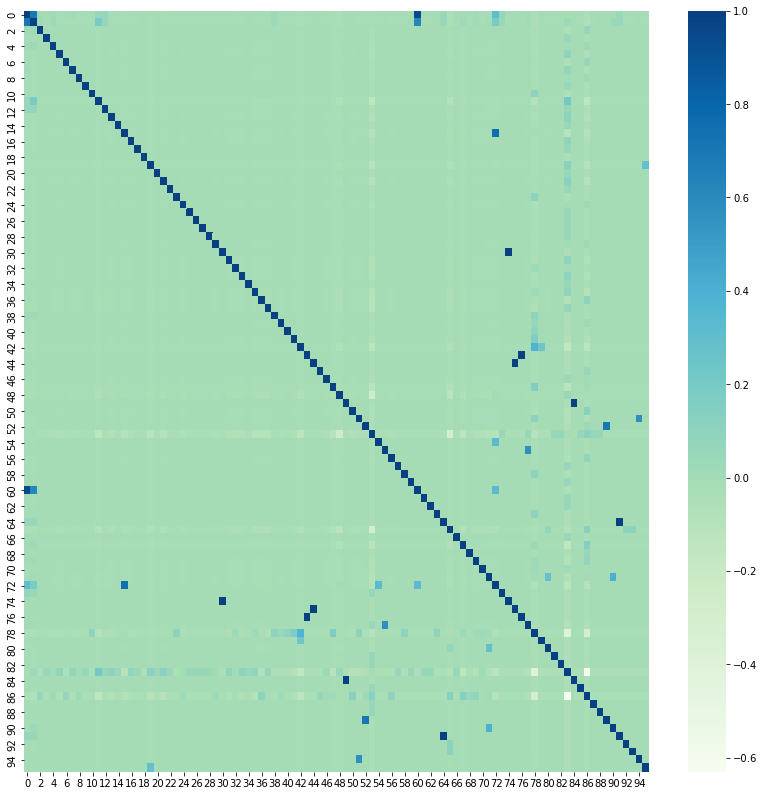

In [91]:
# Check the correlation between features
fig, ax = plt.subplots(figsize=(14, 14))
sns.heatmap(df_standard.corr(), cmap = 'GnBu', ax=ax)

### PCA Operation

In [93]:
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(df_standard)
crypto_pca

array([[-3.35913620e-01,  1.04340531e+00, -5.37409264e-01, ...,
        -6.14277231e-15,  9.19806117e-16, -2.31036365e-15],
       [-3.19248850e-01,  1.04354697e+00, -5.37804309e-01, ...,
        -6.19256491e-15,  1.23335827e-15, -2.28735107e-15],
       [ 2.30471594e+00,  1.66999561e+00, -6.24076993e-01, ...,
         6.06362138e-14, -1.15307359e-14,  2.79170858e-14],
       ...,
       [ 3.24179380e-01, -2.32278089e+00,  3.87363001e-01, ...,
         1.77290486e-14, -2.17980650e-15,  4.69051544e-14],
       [-1.49546262e-01, -2.05899360e+00,  3.79619710e-01, ...,
        -4.03457788e-15, -2.34583005e-15, -2.26948918e-15],
       [-2.90587486e-01,  8.27023611e-01, -2.51533368e-01, ...,
        -4.84907814e-15, -7.63949515e-16,  1.68851848e-16]])

In [94]:
crypto_pca.shape

(532, 74)

In [95]:
df_pca = pd.DataFrame(data=crypto_pca)
df_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335914,1.043405,-0.537409,0.001347,7.044362e-14,-8.714740e-15,-0.013578,-1.329940,-0.053106,-0.333927,...,2.934328e-15,2.434496e-15,2.487027e-15,9.790269e-16,-3.468535e-15,5.620176e-15,5.089347e-15,-6.142772e-15,9.198061e-16,-2.310364e-15
1,-0.319249,1.043547,-0.537804,0.001337,7.045326e-14,-8.731066e-15,-0.014190,-1.332705,-0.057966,-0.330612,...,2.804558e-15,2.850274e-15,2.097958e-15,8.656337e-16,-3.420764e-15,5.449385e-15,4.814896e-15,-6.192565e-15,1.233358e-15,-2.287351e-15
2,2.304716,1.669996,-0.624077,0.004420,1.091008e-13,-1.482739e-14,-0.062312,-1.554093,-0.945690,0.375087,...,4.253182e-14,-5.451376e-14,-6.953702e-15,-1.178457e-14,-2.213607e-14,5.629484e-14,-2.202371e-13,6.063621e-14,-1.153074e-14,2.791709e-14
3,-0.145455,-1.323925,0.177429,-0.001167,-2.770382e-14,3.303192e-15,0.000326,0.283548,0.252906,-0.079820,...,1.259610e-14,-5.735513e-15,-4.278538e-15,-8.689696e-15,-5.091938e-15,1.631924e-14,-4.255179e-14,1.286336e-14,-3.613047e-15,1.298285e-14
4,-0.151951,-2.044976,0.364208,-0.001636,-5.536610e-14,5.409159e-15,0.032350,0.524429,0.191031,0.074021,...,9.196044e-14,2.759134e-14,1.051899e-13,-7.155033e-15,9.718189e-15,-4.063729e-15,-1.812442e-13,-9.815111e-15,-4.360231e-14,7.167421e-14


In [96]:
# Visualization
tsne = TSNE(learning_rate=35)
tsne_features = tsne.fit_transform(crypto_pca)
# the first column of transformed features

df_pca['x'] = tsne_features[:,0]

# the second column of transformed features
df_pca['y'] = tsne_features[:,1]

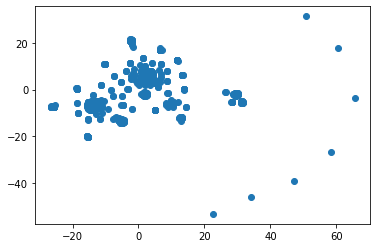

In [97]:
# visualize the clusters
plt.scatter(df_pca['x'], df_pca['y'])
plt.show()

### Elbow Method

In [100]:
wcss = []
k = list(range(1, 11))

# Calculate the wcss for the range of k values
for i in k:
    km = KMeans(n_clusters=i, init='k-means++', random_state=2)
    km.fit(df_pca)
    wcss.append(km.inertia_)

# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "wcss": wcss}
df_elbow = pd.DataFrame(elbow_data)
df_elbow.hvplot.line(x="k", y="wcss", xticks=k, title="Elbow Curve")

c:\Users\Jeff\anaconda3\envs\tensorflow-use-2\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.



:Curve   [k]   (wcss)

The Best Value for `k` is 4 using the elbow curve

In [101]:
model = KMeans(n_clusters=6, init='k-means++', random_state=0)
# Fit the model
model.fit(df_pca)
# Predict clusters
predictions = model.predict(df_pca)

df_pca['class'] = model.labels_

In [102]:
df_pca

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,x,y,class
0,-0.335914,1.043405,-0.537409,0.001347,7.044362e-14,-8.714740e-15,-0.013578,-1.329940,-0.053106,-0.333927,...,9.790269e-16,-3.468535e-15,5.620176e-15,5.089347e-15,-6.142772e-15,9.198061e-16,-2.310364e-15,-11.172707,-7.273732,4
1,-0.319249,1.043547,-0.537804,0.001337,7.045326e-14,-8.731066e-15,-0.014190,-1.332705,-0.057966,-0.330612,...,8.656337e-16,-3.420764e-15,5.449385e-15,4.814896e-15,-6.192565e-15,1.233358e-15,-2.287351e-15,-14.115664,-4.708459,4
2,2.304716,1.669996,-0.624077,0.004420,1.091008e-13,-1.482739e-14,-0.062312,-1.554093,-0.945690,0.375087,...,-1.178457e-14,-2.213607e-14,5.629484e-14,-2.202371e-13,6.063621e-14,-1.153074e-14,2.791709e-14,-25.179066,-6.642491,4
3,-0.145455,-1.323925,0.177429,-0.001167,-2.770382e-14,3.303192e-15,0.000326,0.283548,0.252906,-0.079820,...,-8.689696e-15,-5.091938e-15,1.631924e-14,-4.255179e-14,1.286336e-14,-3.613047e-15,1.298285e-14,30.182634,-1.810686,3
4,-0.151951,-2.044976,0.364208,-0.001636,-5.536610e-14,5.409159e-15,0.032350,0.524429,0.191031,0.074021,...,-7.155033e-15,9.718189e-15,-4.063729e-15,-1.812442e-13,-9.815111e-15,-4.360231e-14,7.167421e-14,11.710782,12.508629,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471052,0.822640,-0.090393,-0.007473,5.247329e-14,-1.317839e-14,-0.848840,2.044413,3.558069,-2.407272,...,-8.312454e-15,-3.070288e-15,1.039975e-14,-4.425045e-14,1.042722e-14,-8.581360e-15,1.087360e-14,26.538162,-1.165794,3
528,-0.333959,1.043287,-0.537434,0.001349,7.040537e-14,-8.793717e-15,-0.013603,-1.330309,-0.053753,-0.333480,...,9.249047e-16,-3.598262e-15,5.334615e-15,5.068337e-15,-5.873972e-15,1.010958e-15,-2.372538e-15,-15.335513,-7.576946,4
529,0.324179,-2.322781,0.387363,-0.001291,-5.406080e-14,6.373632e-15,0.022272,0.167091,-0.044758,0.260887,...,-2.854210e-14,-1.741083e-14,4.817370e-14,-7.202067e-14,1.772905e-14,-2.179807e-15,4.690515e-14,-1.994565,21.170481,2
530,-0.149546,-2.058994,0.379620,-0.001675,-5.756609e-14,6.921264e-15,0.033758,0.550420,0.235951,0.074012,...,3.153529e-16,-1.364775e-15,4.561990e-15,-3.284327e-15,-4.034578e-15,-2.345830e-15,-2.269489e-15,6.484429,16.971725,2


### Visualization with 3 components

In [107]:
# Reudce the feature dimensions into 3 components
pca_3 = PCA(n_components=3)
df_pca_3 = pca_3.fit_transform(df_pca.iloc[:, :75])
df_pca_3 = pd.DataFrame(data=df_pca_3, columns=['PCA1', 'PCA2', 'PCA3'])

In [108]:
df_pca_3

,PCA1,PCA2,PCA3
0,-12.337732,-0.256727,0.163385
1,-15.272173,-0.234618,0.142367
2,-26.419774,2.457646,0.463834
3,29.185308,-0.258783,-0.492684
4,10.661928,-0.225391,-1.351493
...,...,...,...
527,25.582730,2.318727,1.260746
528,-16.488429,-0.247218,0.134451
529,-3.069515,0.294893,-1.789788
530,5.438545,-0.212154,-1.365616


In [110]:
df_pca

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,x,y,class
0,-0.335914,1.043405,-0.537409,0.001347,7.044362e-14,-8.714740e-15,-0.013578,-1.329940,-0.053106,-0.333927,...,9.790269e-16,-3.468535e-15,5.620176e-15,5.089347e-15,-6.142772e-15,9.198061e-16,-2.310364e-15,-11.172707,-7.273732,4
1,-0.319249,1.043547,-0.537804,0.001337,7.045326e-14,-8.731066e-15,-0.014190,-1.332705,-0.057966,-0.330612,...,8.656337e-16,-3.420764e-15,5.449385e-15,4.814896e-15,-6.192565e-15,1.233358e-15,-2.287351e-15,-14.115664,-4.708459,4
2,2.304716,1.669996,-0.624077,0.004420,1.091008e-13,-1.482739e-14,-0.062312,-1.554093,-0.945690,0.375087,...,-1.178457e-14,-2.213607e-14,5.629484e-14,-2.202371e-13,6.063621e-14,-1.153074e-14,2.791709e-14,-25.179066,-6.642491,4
3,-0.145455,-1.323925,0.177429,-0.001167,-2.770382e-14,3.303192e-15,0.000326,0.283548,0.252906,-0.079820,...,-8.689696e-15,-5.091938e-15,1.631924e-14,-4.255179e-14,1.286336e-14,-3.613047e-15,1.298285e-14,30.182634,-1.810686,3
4,-0.151951,-2.044976,0.364208,-0.001636,-5.536610e-14,5.409159e-15,0.032350,0.524429,0.191031,0.074021,...,-7.155033e-15,9.718189e-15,-4.063729e-15,-1.812442e-13,-9.815111e-15,-4.360231e-14,7.167421e-14,11.710782,12.508629,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471052,0.822640,-0.090393,-0.007473,5.247329e-14,-1.317839e-14,-0.848840,2.044413,3.558069,-2.407272,...,-8.312454e-15,-3.070288e-15,1.039975e-14,-4.425045e-14,1.042722e-14,-8.581360e-15,1.087360e-14,26.538162,-1.165794,3
528,-0.333959,1.043287,-0.537434,0.001349,7.040537e-14,-8.793717e-15,-0.013603,-1.330309,-0.053753,-0.333480,...,9.249047e-16,-3.598262e-15,5.334615e-15,5.068337e-15,-5.873972e-15,1.010958e-15,-2.372538e-15,-15.335513,-7.576946,4
529,0.324179,-2.322781,0.387363,-0.001291,-5.406080e-14,6.373632e-15,0.022272,0.167091,-0.044758,0.260887,...,-2.854210e-14,-1.741083e-14,4.817370e-14,-7.202067e-14,1.772905e-14,-2.179807e-15,4.690515e-14,-1.994565,21.170481,2
530,-0.149546,-2.058994,0.379620,-0.001675,-5.756609e-14,6.921264e-15,0.033758,0.550420,0.235951,0.074012,...,3.153529e-16,-1.364775e-15,4.561990e-15,-3.284327e-15,-4.034578e-15,-2.345830e-15,-2.269489e-15,6.484429,16.971725,2


In [113]:
df_coinname = df.reset_index()

In [115]:
df_coinname = df_coinname[['CoinName']]

In [116]:
df_coinname

,CoinName
0,42 Coin
1,404Coin
2,EliteCoin
3,Bitcoin
4,Ethereum
...,...
527,ZEPHYR
528,Gapcoin
529,Beldex
530,Horizen


In [117]:
df_combined = df_pca.join(df_pca_3, how='outer')
df_combined = df_coinname.join(df_combined, how='outer')

In [158]:
df_combined.head(10)

,CoinName,0,1,2,3,4,5,6,7,8,...,70,71,72,73,x,y,class,PCA1,PCA2,PCA3
0,42 Coin,-0.335914,1.043405,-0.537409,0.001347,7.044362e-14,-8.714740e-15,-0.013578,-1.329940,-0.053106,...,5.089347e-15,-6.142772e-15,9.198061e-16,-2.310364e-15,-11.172707,-7.273732,4,-12.337732,-0.256727,0.163385
1,404Coin,-0.319249,1.043547,-0.537804,0.001337,7.045326e-14,-8.731066e-15,-0.014190,-1.332705,-0.057966,...,4.814896e-15,-6.192565e-15,1.233358e-15,-2.287351e-15,-14.115664,-4.708459,4,-15.272173,-0.234618,0.142367
2,EliteCoin,2.304716,1.669996,-0.624077,0.004420,1.091008e-13,-1.482739e-14,-0.062312,-1.554093,-0.945690,...,-2.202371e-13,6.063621e-14,-1.153074e-14,2.791709e-14,-25.179066,-6.642491,4,-26.419774,2.457646,0.463834
3,Bitcoin,-0.145455,-1.323925,0.177429,-0.001167,-2.770382e-14,3.303192e-15,0.000326,0.283548,0.252906,...,-4.255179e-14,1.286336e-14,-3.613047e-15,1.298285e-14,30.182634,-1.810686,3,29.185308,-0.258783,-0.492684
4,Ethereum,-0.151951,-2.044976,0.364208,-0.001636,-5.536610e-14,5.409159e-15,0.032350,0.524429,0.191031,...,-1.812442e-13,-9.815111e-15,-4.360231e-14,7.167421e-14,11.710782,12.508629,2,10.661928,-0.225391,-1.351493
5,Litecoin,-0.166203,-1.125277,-0.008683,-0.000573,-4.575755e-15,2.685566e-16,0.013280,-0.400212,-0.026084,...,-6.441057e-16,-4.852154e-15,-1.153690e-16,-1.603937e-15,4.129704,5.961550,2,3.034629,-0.183145,-1.060819
6,Dash,-0.396126,1.247879,-0.471372,0.001380,6.464507e-14,-7.126524e-15,-0.009251,-1.003112,0.142399,...,2.710939e-15,-3.478508e-15,1.498501e-15,-2.654663e-16,-5.446914,-14.147209,1,-6.592186,-0.341630,0.613087
7,Monero,-0.149777,-2.232984,0.388988,-0.001762,-5.784716e-14,9.763941e-15,0.036962,0.336875,0.311877,...,-3.398763e-13,4.727485e-14,-2.853712e-13,4.591730e-13,-2.702163,11.625813,2,-3.780301,-0.179661,-1.719479
8,Ethereum Classic,-0.150393,-2.045078,0.364190,-0.001634,-5.524923e-14,5.369991e-15,0.032332,0.524131,0.190511,...,-1.811371e-13,-9.878422e-15,-4.373809e-14,7.184447e-14,11.710758,12.508635,2,10.661893,-0.223821,-1.351657
9,ZCash,-0.149545,-2.058994,0.379620,-0.001675,-5.753018e-14,6.965141e-15,0.033757,0.550420,0.235951,...,-3.677090e-15,-4.224397e-15,-2.509509e-15,-2.222654e-15,6.484429,16.971724,2,5.438545,-0.212153,-1.365616


In [119]:
# Create a 3D-Scatter with the PCA data and the clusters
fig = px.scatter_3d(
    df_combined,
    x="PCA1",
    y="PCA2",
    z="PCA3",
    hover_name='CoinName',
    color="class",
    symbol="class",
)
fig.update_layout(legend=dict(x=0, y=1))
fig.show()

### Observations on Clusters

In [140]:
# Merge the class prediction into the original df
df.reset_index(inplace=True)
df.drop(columns=['index', 'level_0'], inplace=True)

In [141]:
df_validation = df.join(df_pca.iloc[:, 76:], how='outer')

In [156]:
# class = 1
df_validation[df_validation['class'] == 1].head(10)

,Id,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply,class
6,DASH,Dash,X11,True,PoW/PoS,9.031294e+06,2.200000e+07,1
26,QRK,QuarkCoin,Quark,True,PoW,2.595572e+08,2.470000e+08,1
52,IOC,IOCoin,X11,True,PoW/PoS,1.765091e+07,2.200000e+07,1
77,SYNC,SyncCoin,X11,True,PoW/PoS,1.177000e+03,1.000000e+03,1
81,TIT,TittieCoin,PHI1612,True,PoS,1.622326e+09,2.300000e+09,1
82,TOR,TorCoin,X11,True,PoW/PoS,1.431851e+06,1.000000e+07,1
93,XC,X11 Coin,X11,True,PoW/PoS,6.950831e+06,5.500000e+06,1
126,ISL,IslaCoin,X11,True,PoW/PoS,1.513704e+06,0.000000e+00,1
131,DRZ,Droidz,QUAIT,True,PoW/PoS,8.568038e+06,5.060000e+06,1
133,SQL,Squall Coin,X11,True,PoS/PoW,3.292000e+05,0.000000e+00,1


In [155]:
# class = 2
df_validation[df_validation['class'] == 2].head(10)

,Id,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply,class
4,ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0.000000e+00,2
5,LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,8.400000e+07,2
7,XMR,Monero,CryptoNight-V7,True,PoW,1.720114e+07,0.000000e+00,2
8,ETC,Ethereum Classic,Ethash,True,PoW,1.133597e+08,2.100000e+08,2
9,ZEC,ZCash,Equihash,True,PoW,7.383056e+06,2.100000e+07,2
11,DGB,DigiByte,Multiple,True,PoW,1.140622e+10,2.100000e+10,2
14,PRC,ProsperCoin,Scrypt,True,PoW,5.768310e+06,2.100000e+07,2
17,ARG,Argentum,Scrypt,True,PoW,1.220580e+07,6.400000e+07,2
20,XMY,MyriadCoin,Multiple,True,PoW,1.688254e+09,2.000000e+09,2
21,MOON,MoonCoin,Scrypt,True,PoW,8.800000e+01,3.840000e+11,2


In [154]:
# class = 3
df_validation[df_validation['class'] == 3].head(10)

,Id,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply,class
3,BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,2.100000e+07,3
12,BTCD,BitcoinDark,SHA-256,True,PoW/PoS,1.288862e+06,2.200000e+07,3
13,XPY,PayCoin,SHA-256,True,PoS,1.199533e+07,1.250000e+07,3
22,ZET,ZetaCoin,SHA-256,True,PoW,1.702044e+08,1.697956e+08,3
37,DVC,DevCoin,SHA-256,True,PoW,1.877386e+10,2.100000e+10,3
53,IXC,IXcoin,SHA-256,True,PoW,2.108935e+07,2.100000e+07,3
62,MZC,MazaCoin,SHA-256,True,PoW/PoS,1.613836e+09,2.419200e+09,3
66,NMC,Namecoin,SHA-256,True,PoW,1.473640e+07,2.100000e+07,3
78,SYS,SysCoin,SHA-256,True,PoW,5.633365e+08,8.880000e+08,3
80,TGC,TigerCoin,SHA-256,True,PoW,4.353680e+07,4.701197e+07,3


In [157]:
# class = 4
df_validation[df_validation['class'] == 4]

,Id,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply,class
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,4.200000e+01,4
1,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,5.320000e+08,4
2,1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,3.141593e+11,4
15,KOBO,KoboCoin,X15,True,PoW/PoS,2.554254e+07,3.500000e+08,4
18,AUR,Aurora Coin,Scrypt,True,PoW/PoS,1.813510e+07,1.676858e+07,4
...,...,...,...,...,...,...,...,...
504,GRS,Groestlcoin,Groestl,True,PoW,7.329820e+07,1.050000e+08,4
506,CLUB,ClubCoin,Scrypt,True,PoW/PoS,1.036219e+08,1.600000e+08,4
514,XWC,WhiteCoin,Scrypt,True,PoW/PoS,2.520056e+08,3.000000e+08,4
517,TRI,Triangles Coin,X13,True,PoW/PoS,1.407778e+05,1.200000e+05,4


### Conclusion

On the opposite of the previous trial, this notebook used more categorical variables to cluster the tokens that aims to bring a more intuitive understanding towards the difference between crypto in the market. As an unsupervised learning problem, we used the properties of the tokens such as ProofType, Algorithm and Coins Supply to perform clustering. Based on the Elbow Method, it is found that `4` distinct groups could be found across all the tokens. 

Across the four groups, it is found that the Algorithm type is the most important factor in determining which group the token belongs to.

###  Recommendations

There are more attributes of a token that can be factor into the clustering model. For exmaple, the number of twitter followers, the reddit thread number and the years of launch. These could also be important market signals that reflects how the public respond to the tokens. 